# Project 1, Part 1

Ashton Cole

AVC687

COE 379L: Software Design for Responsive Intelligent Systems

## Description

Our core question is *What variables impact the fuel economy of automobiles?* In this part, we explore a dataset of automobile information. This includes cleaning, reformatting, and investigating potential relationships between variables.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
cars = pd.read_csv('https://raw.githubusercontent.com/joestubbs/coe379L-sp24/master/datasets/unit01/project1.data')

## Shape

First, we investigate what sort of data we are dealing with.

In [3]:
cars.shape

(398, 9)

Here, we see that there are 398 entries for 9 variables of data.

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


The origin field is not entirely clear. Let's inspect its contents.

In [6]:
cars['origin'].unique()

array([1, 3, 2])

These integers are likely categories for certain origins, but it is unclear what the origin refers to. Does it refer to countries where the car companies are headquartered? Or states where the cars are manufactured? Or simply from where the data was aquired, e.g. certain databases?

Ordinarily, it would make sense to convert this column into one-hot encoding. However, it might be safer to remove the column. Country of origin might be a helpful predictor of efficiency, e.g. that Japanese cars are more efficient. On the other hand, the database from which the record was drawn would not be relevant. Regardless, it is safer to exclude this unknown.

## Type Conversions

From the prior section, it is clear that some fields' types could be improved. Thankfully, we do not have any null values, but there could still be "bad" entries.

- Horsepower should be an integer, not an object.
- The year is only stored to two digits. It might be good to adjust to the full number if it crosses the millenium, to maintain the sequence of the years.
- We might want to convert the categorical model column to one-hot encoding.

### Horsepower

In [7]:
cars['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
cars[cars['horsepower'].astype(str) == '?'].shape

(6, 9)

Note here that ? is entered for some columns. This means that some records do not have a recorded horsepower. We will have to decide how to handle these 6 entries.

It might be reasonable to set their horsepowers to the average of cars with their number of cylinders. Let's see how tightly the two variables correlate.

In [9]:
# Put a modified copy of the dataframe in another variable
cars_reduced = cars[cars['horsepower'].astype(str) != '?'].copy()
cars_reduced['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

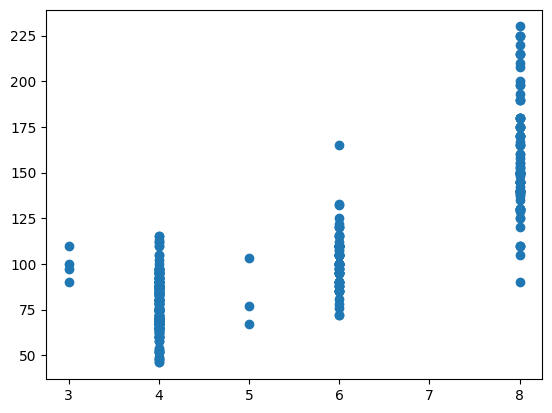

In [10]:
# This creates an additional row for some reason
# cars_reduced.loc['horsepower'] = cars_reduced['horsepower'].astype(str).astype(int)

cars_reduced = cars_reduced.astype({'horsepower' : str}).astype({'horsepower' : int})

fig, ax = plt.subplots()
ax.scatter(cars_reduced['cylinders'], cars_reduced['horsepower'])
fig.show()

This is not a very tight correlation, and requires trimming a small part of the data set--about 1.5%. It seems it would be best to just remove these values.

In [11]:
cars_old = cars
cars = cars_reduced

### Year

Let's check the year range.

In [12]:
cars['model_year'].max() 

82

In [13]:
cars['model_year'].min()

70

Since this only ranges from 1970 to 1982, converting the years does not benefit us.

### Car Name

The name of the car is categorical. It could be represented with one-hot encoding, but let's see how many unique types there are first.

In [14]:
cars['car_name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [15]:
cars['car_name'].unique().size

301

One-hot encoding would not be ideal in this case. Brand (the first word for most models) might be better, but it would require additional data processing. These variables might be relevant. E.g., 8-cylinder Chevrolets, *ceteris paribus*, might have a different mileage from 8-cylinder Buicks. Nevertheless, for simplicity, we exclude such possibilities from our analysis.

## Drop Columns

As discussed, the car name and origin columns are excluded.

In [16]:
cars.drop(['car_name', 'origin'], axis=1, inplace=True)

## Duplicates

In [ ]:
Rows are checked for duplicate entries.

In [ ]:
cars[cars.duplicates()]

## Review

Let's see what the modified data set looks like, and save it for future use.

In [17]:
cars.shape

(392, 7)

In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


In [19]:
cars.to_csv('cars.csv')

## Identify Missing Data

This was already done when converting data types. There are no null entries to be dealt with.

## Univariate Analysis

We inspect how each variable is distributed.

In [20]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


From this, we can identify whether variables have outliers. Formally, this means that the values are more than 3 standard deviations away from the mean. Under this definition, only mpg, horsepower, and acceleration have outlying maxima, but others like displacement and weight get close. Let's visualize some of these.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mpg', ylabel='Count'>

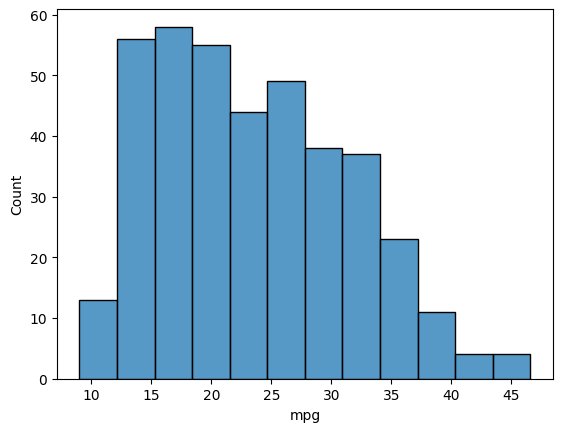

In [21]:
sns.histplot(data=cars['mpg'])

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='horsepower', ylabel='Count'>

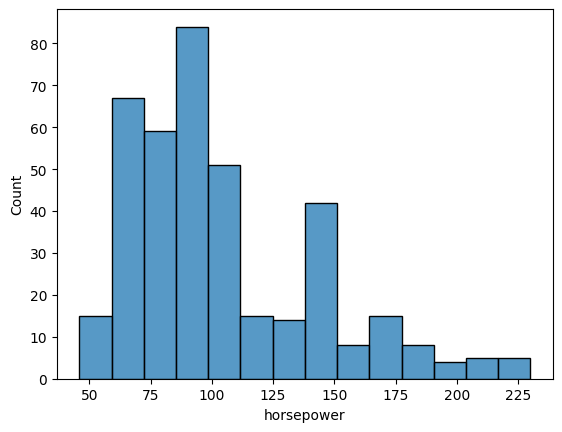

In [22]:
sns.histplot(data=cars['horsepower'])

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weight', ylabel='Count'>

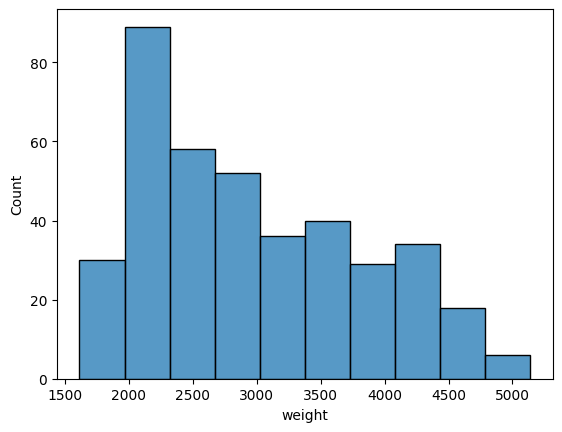

In [23]:
sns.histplot(data=cars['weight'])

These are all distributed quite widely, explaining why they have outliers. However, there are no data that seem particularly extreme to be concerned about.

## Correlations

In [24]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


Notably, displacement, cylinders, car weight, and horsepower have the highest impact on mileage. They are all anti-correlated. Most  of the directions of correlation are as one might expect, although interestingly it seems cars with better mileage have better acceleration.

## Bivariate Analysis

Let's see how those correlated variables relate to mileage.

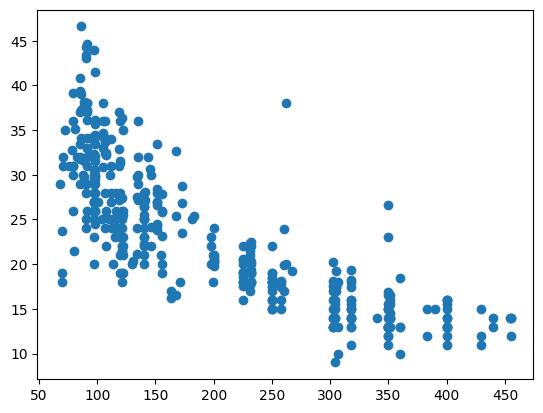

In [25]:
fig, ax = plt.subplots()
ax.scatter(cars_reduced['displacement'], cars_reduced['mpg'])
fig.show()

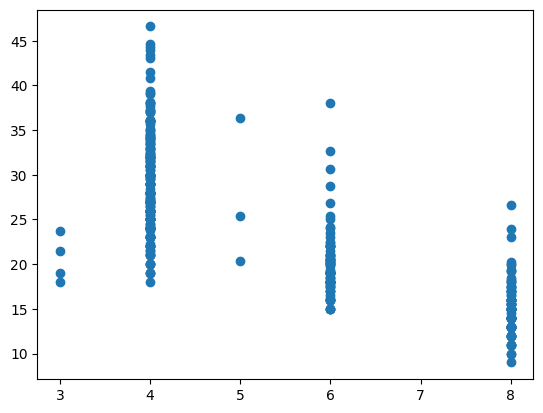

In [26]:
fig, ax = plt.subplots()
ax.scatter(cars_reduced['cylinders'], cars_reduced['mpg'])
fig.show()

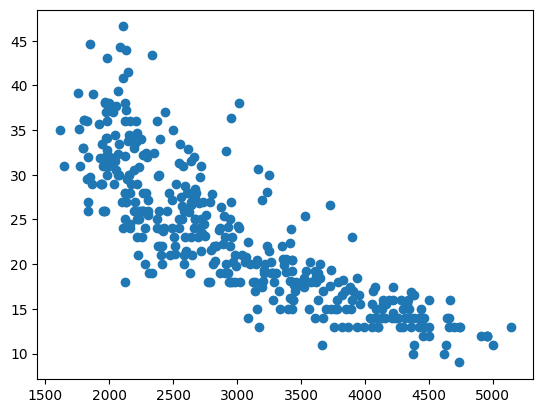

In [27]:
fig, ax = plt.subplots()
ax.scatter(cars_reduced['weight'], cars_reduced['mpg'])
fig.show()

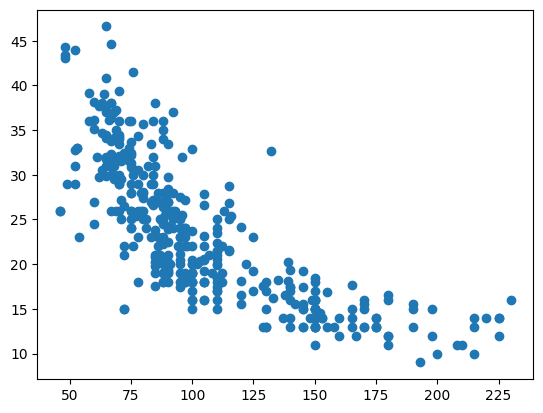

In [28]:
fig, ax = plt.subplots()
ax.scatter(cars_reduced['horsepower'], cars_reduced['mpg'])
fig.show()

## Insights

- We can conclude that the data points are all reasonable. There are no major outliers to be wary of.
- The most correlated variables with mileage all show nonlinear relationships, which means that although a linear model might be a fair starting point, it is not the optimum.
- No variables in particular are highly correlated, suggesting that there may be other factors at play. After all, mileage is dependent on things like engine characteristics and weight.